# FullStack Project - DS / AI Task

Developed by Lucas Glasner Regis in June 2023.  
For FullStack.

This code is delivered AS IS. No warranties.

In [1]:
# IMPORTs
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1 - Data Loading and basic EDA

In [2]:
# Data Loading
df = pd.read_csv("train.csv")
df.head(3)

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000


In [3]:
df.describe()

,uid,latitude,longitude,garageSpaces,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,7626.621900,30.291191,-97.778476,1.229600,1988.570400,0.667200,2.071028e+04,5.766236,14.857700,2.692100,3.449200
std,4380.486852,0.097075,0.084543,1.328179,21.515272,0.986378,4.488338e+05,1.861940,1.748473,0.979206,0.813441
min,1.000000,30.085030,-98.020477,0.000000,1905.000000,0.000000,1.000000e+02,2.333333,10.000000,1.000000,1.000000
25%,3838.750000,30.202516,-97.838594,0.000000,1975.000000,0.000000,6.534000e+03,4.000000,14.000000,2.000000,3.000000
50%,7603.500000,30.283664,-97.769680,1.000000,1993.000000,0.000000,8.189000e+03,5.666667,15.000000,3.000000,3.000000
75%,11435.750000,30.366375,-97.718313,2.000000,2006.000000,1.000000,1.089000e+04,7.000000,16.000000,3.000000,4.000000
max,15170.000000,30.517323,-97.570633,22.000000,2020.000000,8.000000,3.415452e+07,9.500000,19.000000,10.000000,10.000000


In [4]:
df.dtypes

uid                             int64
city                           object
description                    object
homeType                       object
latitude                      float64
longitude                     float64
garageSpaces                    int64
hasSpa                           bool
yearBuilt                       int64
numOfPatioAndPorchFeatures      int64
lotSizeSqFt                   float64
avgSchoolRating               float64
MedianStudentsPerTeacher        int64
numOfBathrooms                float64
numOfBedrooms                   int64
priceRange                     object
dtype: object

---

In [5]:
# df.isnull().sum()

In [6]:
df['priceRange'].value_counts()

250000-350000    2356
350000-450000    2301
450000-650000    2275
650000+          1819
0-250000         1249
Name: priceRange, dtype: int64

---

## 2 - Data PreProcessing

In [7]:
# Treat priceRange as pure number/string for now.

# Test priceRange as CATEGORICAL AS WELL.

In [8]:
# Drop unecessary columns
df.drop(['uid', 'description'], axis=1, inplace=True)

In [9]:
# Select categorical columns for one-hot encoding
categorical_cols = ['homeType', 'hasSpa', 'city']

# One-hot encoding for categorial columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))

# Get unique categories for each column
categories = [df[col].unique() for col in categorical_cols]

# Create feature names for encoded columns
encoded_features = [f"{col}_{cat}" for i, col in enumerate(categorical_cols) for cat in categories[i]]

# Assign the columns to the encoded feature
X_encoded.columns = encoded_features
X = pd.concat([X_encoded, df.drop(categorical_cols + ['priceRange'], axis=1)], axis=1)

y = df['priceRange'].astype('category').cat.codes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


---

## 3 - ML Modelling

In [10]:
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test diferent models, RandomForest, GP Gaussian Processes, XGBoost, GradientBoosting 
model = GradientBoostingRegressor()

# Train model with Fit. Train split 80/20
model.fit(X_train, y_train)

# Model Predict
y_pred = model.predict(X_test)

# Evaluate the model using MSE Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

0.5129026047655806

### Model Evaluation

In [11]:
# Model accuracy metrics
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('R2: ', r2)
print('MAE: ', mae)
print('RMSE: ', rmse)

R2:  0.6929057457644421
MAE:  0.5406599119497171
RMSE:  0.7161721893271062


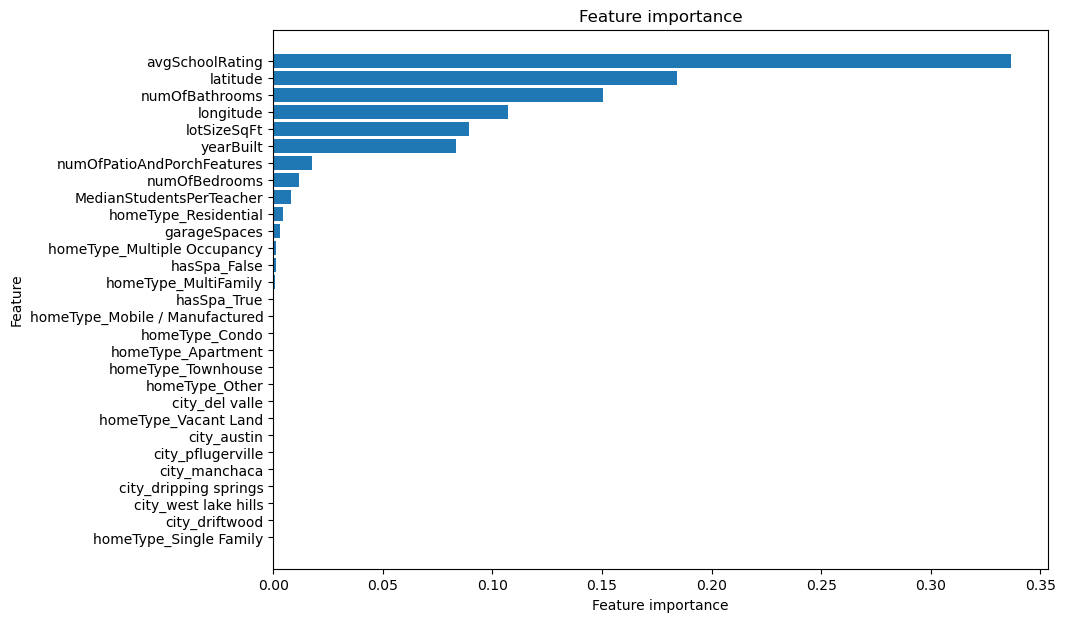

In [12]:
# Feature importance

import matplotlib.pyplot as plt

feature_importances = model.feature_importances_

features_names = X.columns

# Sort Features
sorted_indices = np.argsort(feature_importances)[::1]
sorted_importances = feature_importances[sorted_indices]
sorted_names = features_names[sorted_indices]


# Plot something
plt.figure(figsize=(10,7))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_names)

plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.title('Feature importance')
plt.show()

There's a solid need for revision and tests on other model regressors.  
At least XGBoost, and the great GP Gaussian Processes Regressor ( best from intuiton on this use case. )

There's also a big issue with the TARGET (it has not being properly treated and adapted for better performance)

I intend to come back to work on this with time.

Such project would need at least 48h of work to be conclude satisfactorily.

It all works though, including the deploy function/app.

June 17th, 2023.
Lucas Glasner Regis <lucasglasner@gmail.com>

---

## 4 - Export Model

In [13]:
# Export model to .joblib pickle file

In [14]:
import joblib

# Save model
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [15]:
# OK, it works, performance isn't best but it works.
# OK. I'll test GaussianProcess as it is a favorite. But initially I'll conduct the evaluation of the model and go foward.

In [16]:
# OK. MAE is definetly not best.
# I'll follow through and come back to change it to numerical or TREAT / TRANSFORM the priceRange.

# I think there's a CATCH in this project / Data Set = The priceRange has to be transformed. Well, treated in some way.
# maybe average, maybe categories is not the best idea. OK This should work.

# OK. Since the structure is working I'll follow and then comeback to think it thoroughly.

# OK. I'll print feature importance and develop a deploy via JOBLIB first. 